# Concrete Slump Test Regression

👉 This study will examine the dataset named as **"
Concrete Slump Test Data Set"** at UCI Machine Learning Repository website [external link text](https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test).

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

# Importing dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Loading data and EDA

In [3]:
df = pd.read_csv("cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.describe().T   #std > mean olduğu yerlerde outlier durumu oluyor.

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


In [6]:
df.corr()['Compressive Strength (28-day)(Mpa)'] #target column ile features arasındaki ilişkiye baktım.Yüzde 50 altında hepsi.Yüzde 90a çıkan multicol.

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Graphical analysis

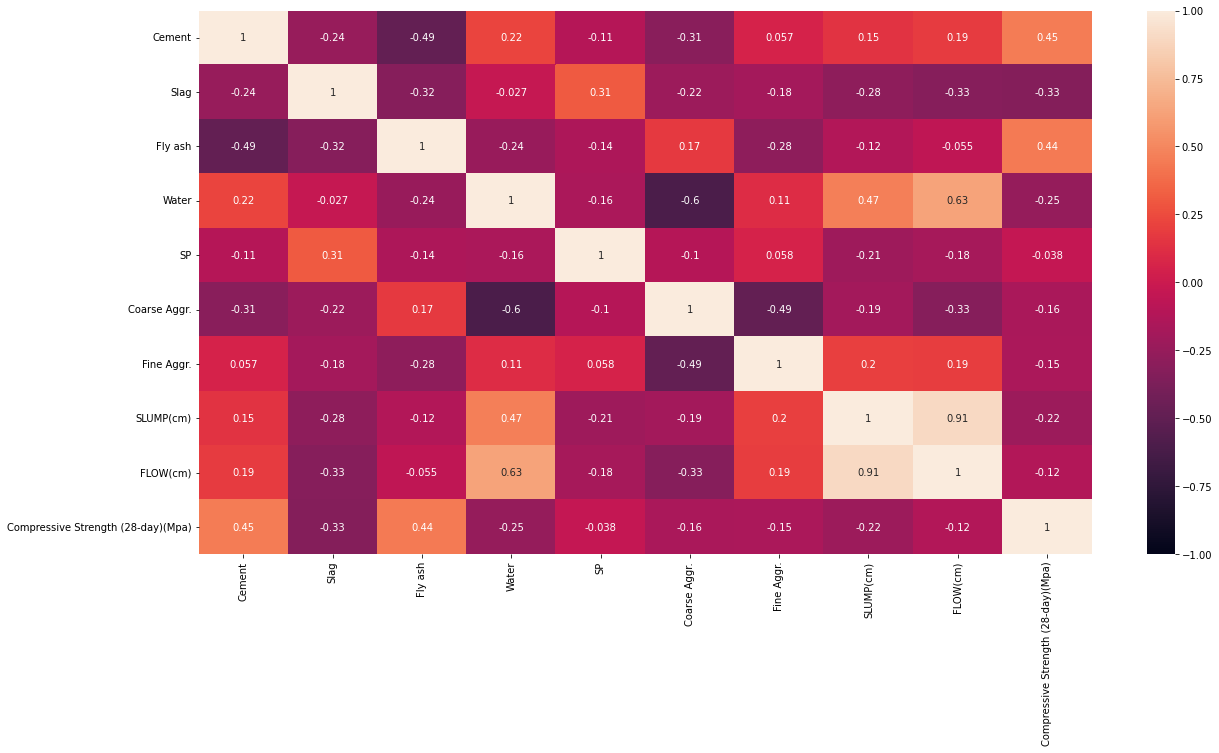

In [7]:
plt.figure(figsize=(20,10))                          #flow ve slump yüzde 90 üzeri corele.Multicol.olduklarını gösterir.
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)

In [8]:
#sns.pairplot(df)  #data küçük olduğunda iyi.

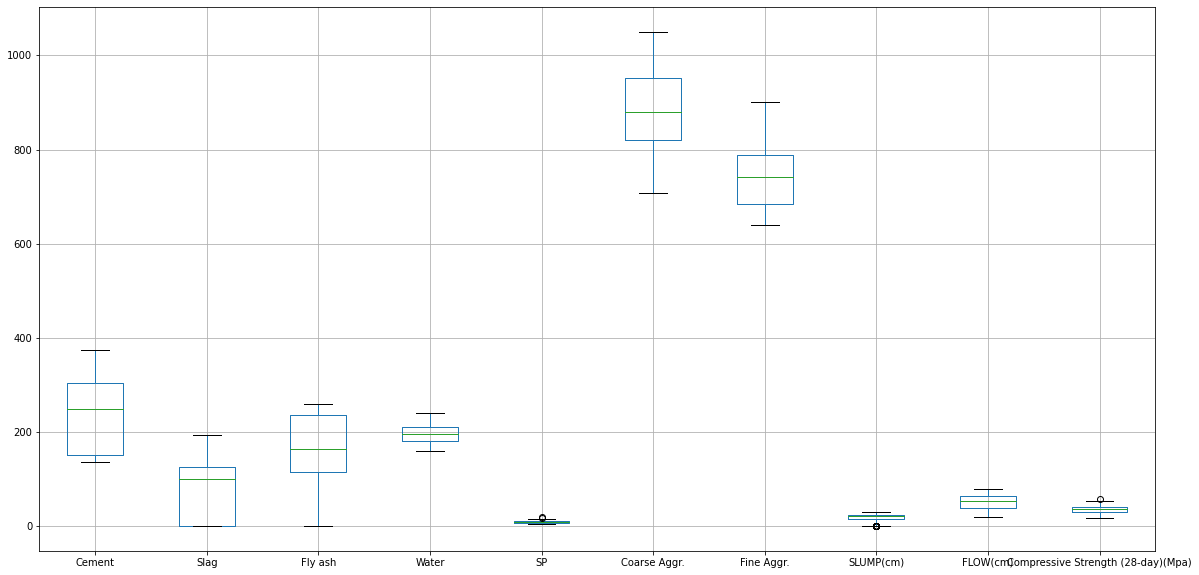

In [9]:
plt.figure(figsize =(20,10))  #Features are different scaled.I should scaled them.box plot also shows this. 
df.boxplot()

### Train | Test Split

In [10]:
x = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

## Scaling the Data

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  
scaler = StandardScaler()

In [15]:
#scaling fit ve transform train set üzerinden yapılır.
scaler.fit(x_train)         

StandardScaler()

In [16]:
x_train_scaled = scaler.transform(x_train)

In [17]:
x_test_scaled = scaler.transform(x_test) 
# data leakage olmasın diye train değerleriyle test datasında transform yapıyoruz


In [18]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    #from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    for item in algos:
        item.fit(x_train,y_train)
        pred = item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
    
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
   

    return result.sort_values('R_Squared',ascending=False)

In [19]:
regression_funct(x_train_scaled,y_train)

,R_Squared,RMSE,MAE
ElasticNet,0.913017,2.097878,1.676145
Lasso,0.912471,2.104457,1.647911
Ridge,0.911972,2.110438,1.740248
LinearRegression,0.911967,2.110506,1.740383
GradientBoostingRegressor,0.839260,2.851837,2.248010
KNeighborsRegressor,0.824862,2.976830,2.512476
ExtraTreeRegressor,0.492370,5.068004,3.338571


## Cross Validate

In [ ]:
---Cross validation yani çapraz doğrulama anlamına gelen yöntem temelde tüm veri setini hem train hem de test verisi gibi kullanmaktadır.
Makine öğrenmesi modeli kurulurken belli bir oranda veriyi train ve test olarak ayırırız. Ancak buradaki handikap örneğin; modelin öğrenmesini istediğimiz bazı uç değerler belki test bölümünde kalmış olabilir. 
Bu değerler train veri seti üzerinde, modeli eğitirken olmayacağı için algoritmayı test edildiğinde sonuçlar beklendiği gibi çıkmayabilir.
O halde neye göre train veri setini ayırmamız gerekiyor ki test sırasında olabildiğince az sürpriz veri ile karşı karşıya kalabilelim. 
Tam bu noktada cross validation ile çapraz doğrulama yaparak train içinde yakalanabilecek en optimum değerleri yakalayabiliriz.

In [20]:
#from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [21]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import ElasticNet

In [22]:
model = ElasticNet()

In [23]:
scores = cross_validate(model, x_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',  #R2 maximize ederken diğerlerini minimize etmeye çalışamaz aynı fonk içinde.oyüzden eksiden max ediyoruz.
                                                            'neg_root_mean_squared_error'], cv = 5)

In [24]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001798,0.001826,0.570214,-4.890605,-34.545133,-5.877511
2,0.000904,0.001221,0.460275,-3.333896,-19.789406,-4.448529
3,0.000892,0.001342,0.542123,-3.013683,-12.724666,-3.567165
4,0.000909,0.001168,0.537711,-5.548235,-50.745379,-7.123579
5,0.000846,0.001104,0.604910,-4.222511,-22.315915,-4.723972


In [26]:
# cross_validation, test setinden aldığımız tek seferlik score ın tutarlı olup olmadığını doğrulamak için yapılır
# train score ile cross validation score kıyaslanıp over fittinge karar verilir
#Burada gördüm ki 0.91lik score elastic netin en iyi paramtresinin sonucudur.cv sonrası score düştü.
#GridSearchCV yaparak elastic net hangi alfa ile ve lasso,ridge ile kulland

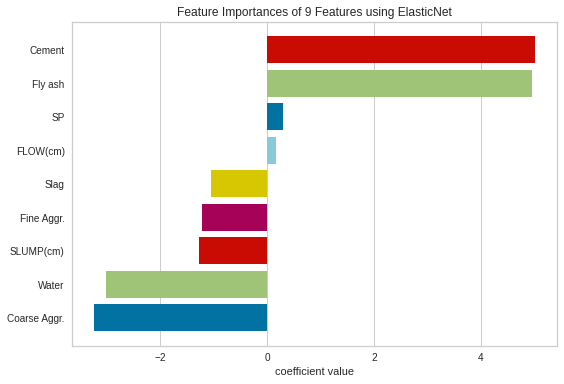

In [27]:
from yellowbrick.model_selection import FeatureImportances 

model = ElasticNet(alpha=0.1)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(x.columns),relative=False)
viz.fit(x_train_scaled,y_train)
viz.show()



In [ ]:
#!pip install pycaret 


In [ ]:
#!pip install scikit-learn==0.23.2

In [28]:
import pandas as pd
import numpy as np 
from pycaret.regression import *

In [29]:
reg =setup(data=df,target="Compressive Strength (28-day)(Mpa)")

,Description,Value
0,session_id,493
1,Target,Compressive Strength (28-day)(Mpa)
2,Original Data,"(103, 10)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(72, 9)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Compressive Strength '
                                             '(28-day)(Mpa)',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_nume...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(tar

In [30]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2961,8.3812,2.7688,0.8114,0.0786,0.0675,0.259
br,Bayesian Ridge,2.2837,8.3621,2.8415,0.7930,0.0793,0.0656,0.011
lasso,Lasso Regression,2.3191,8.4340,2.8603,0.7842,0.0804,0.0670,0.013
en,Elastic Net,2.3316,8.5103,2.8669,0.7807,0.0805,0.0673,0.014
huber,Huber Regressor,2.4620,9.4098,2.9725,0.7675,0.0818,0.0692,0.035
ridge,Ridge Regression,2.4264,8.9751,2.9388,0.7582,0.0826,0.0700,0.012
lr,Linear Regression,2.4273,8.9812,2.9398,0.7579,0.0826,0.0700,0.556
lar,Least Angle Regression,2.4273,8.9812,2.9398,0.7579,0.0826,0.0700,0.012
gbr,Gradient Boosting Regressor,2.4674,10.2548,3.1320,0.7505,0.0930,0.0760,0.076
par,Passive Aggressive Regressor,2.9415,15.0393,3.7319,0.6904,0.1004,0.0822,0.013


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=493, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#best result is from elasticnet with alpha=0.1

In [33]:
final_model = ElasticNet(alpha=0.1)
final_model.fit(x,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
tahmin = final_model.predict(x_test) 

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
(mean_squared_error(tahmin,y_test))**.5


1.9092531955762946

In [38]:
r2_score(tahmin,y_test)

0.9166529252804735